### Handling Imbalanced Dataset

#### What is imbalanced dataset? Why should we handle that?

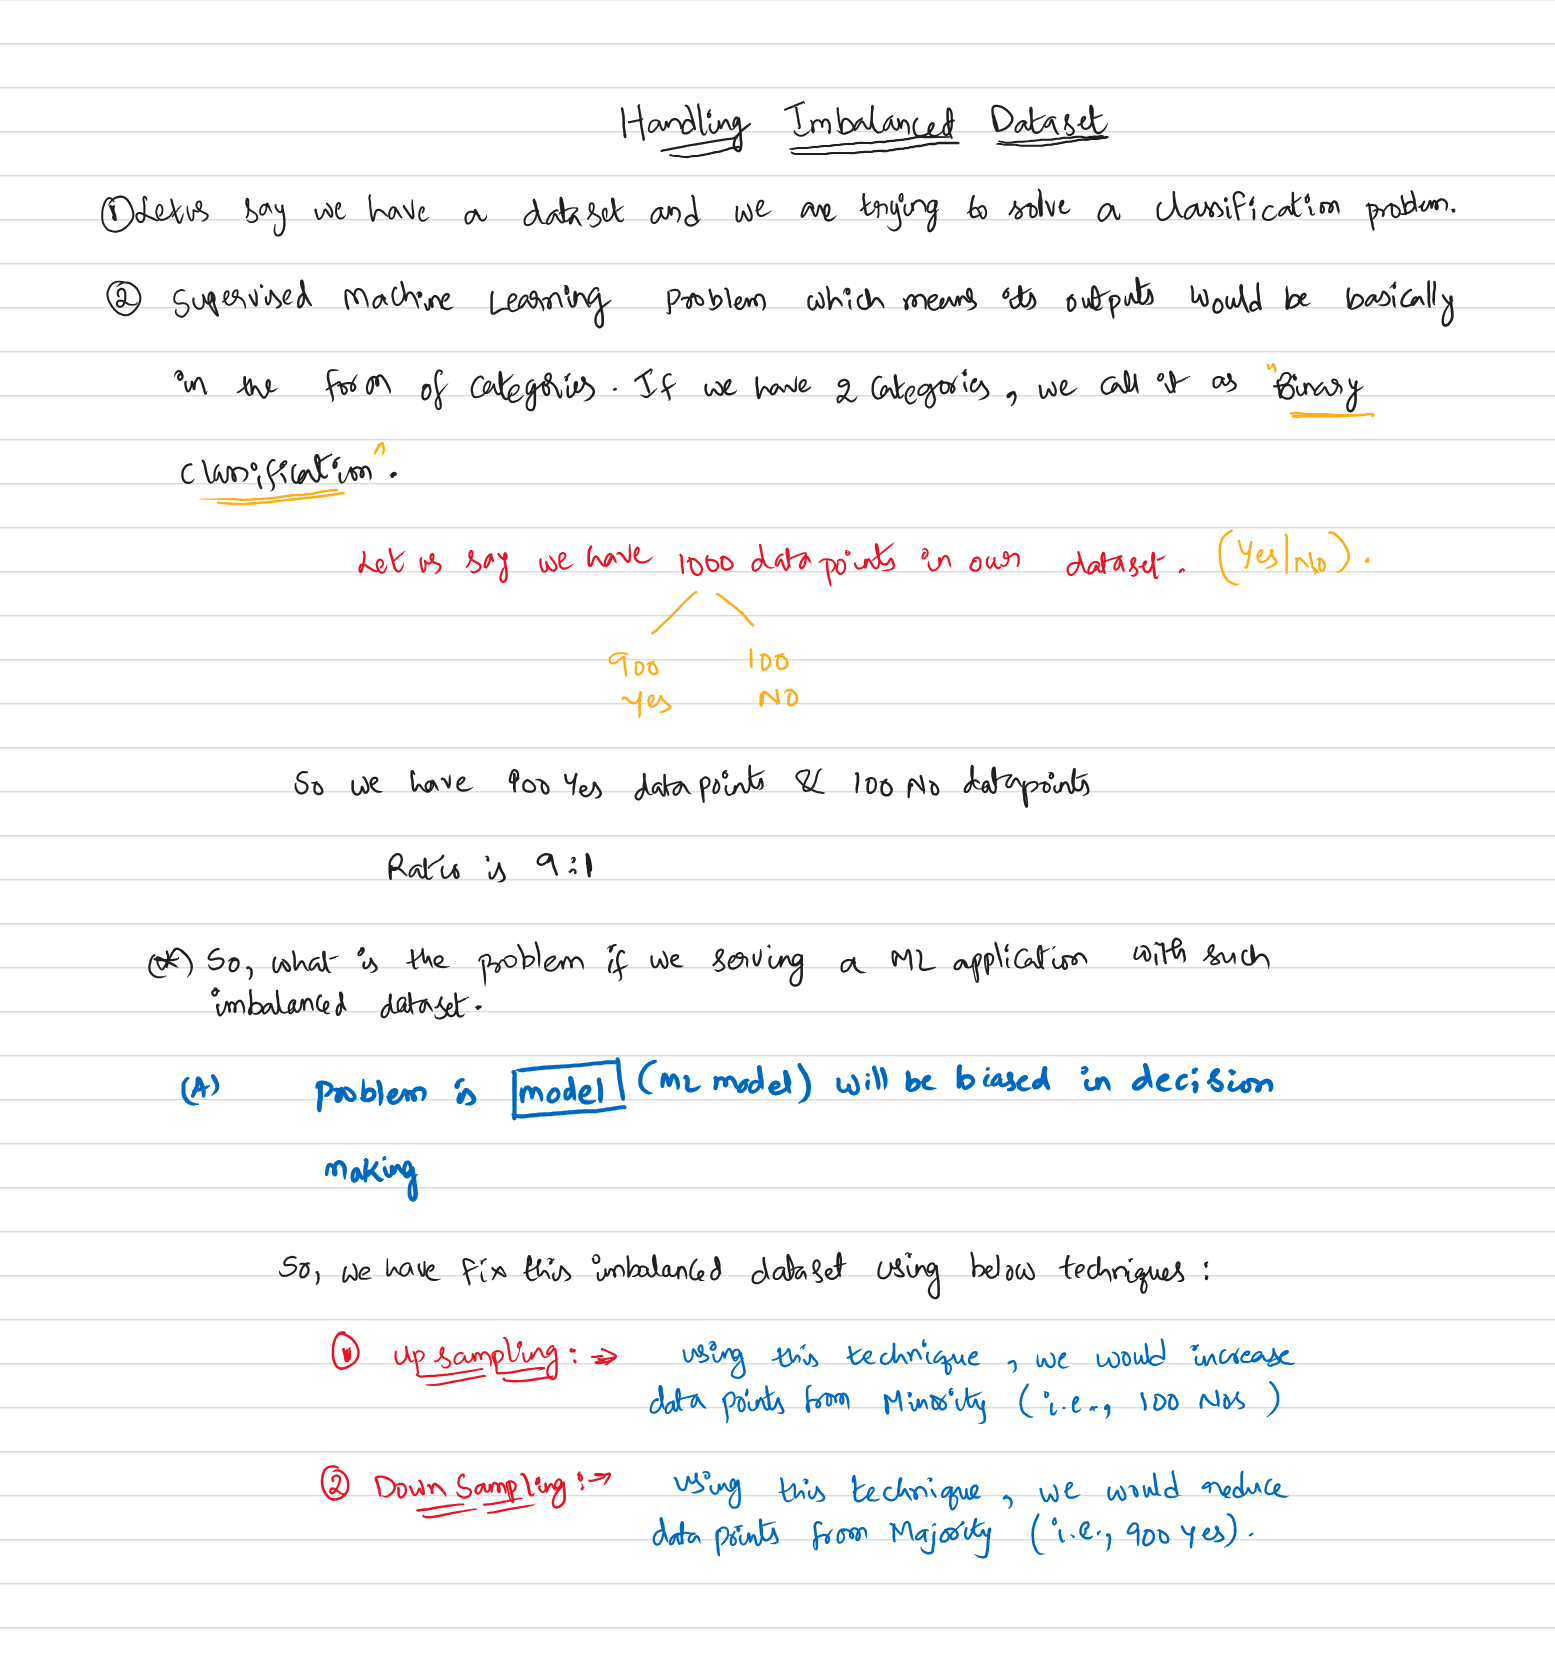

In [8]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

## Initialize values with Imbalanced points
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0
print(n_class_0, n_class_1)


## create a dataframe with two classes
class_0 = pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1] * n_class_1
})

df=pd.concat([class_0,class_1]).reset_index(drop=True)
print(df.head())
print(df.tail())
print(df['target'].value_counts())

900 100
   feature1  feature2  target
0 -1.085631  0.551302       0
1  0.997345  0.419589       0
2  0.282978  1.815652       0
3 -1.506295 -0.252750       0
4 -0.578600 -0.292004       0
     feature1  feature2  target
995  1.376371  2.845701       1
996  2.239810  0.880077       1
997  1.131760  1.640703       1
998  2.902006  0.390305       1
999  2.697490  2.013570       1
target
0    900
1    100
Name: count, dtype: int64


### Upsampling

In [17]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

### This will extrapolate the datapoints 
from sklearn.utils import resample

df_minority_upsampled=resample(df_minority,replace=True, #Sample will be replaced
         n_samples=len(df_majority),
         random_state=42)

df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### Downsampling
* This is not preferrable because we are losing lot of data by doing so.

In [20]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

## Initialize values with Imbalanced points
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0
# print(n_class_0, n_class_1)


## create a dataframe with two classes
class_0 = pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1] * n_class_1
})

df=pd.concat([class_0,class_1]).reset_index(drop=True)
print(df.head())
print(df.tail())
print(df['target'].value_counts())

df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

### This will extrapolate the datapoints 
from sklearn.utils import resample

df_majority_downsampled=resample(df_majority,replace=True, #Sample will be replaced
         n_samples=len(df_minority),
         random_state=45)

df_downsampled=pd.concat([df_minority,df_majority_downsampled])
df_downsampled['target'].value_counts()

   feature1  feature2  target
0 -1.085631  0.551302       0
1  0.997345  0.419589       0
2  0.282978  1.815652       0
3 -1.506295 -0.252750       0
4 -0.578600 -0.292004       0
     feature1  feature2  target
995  1.376371  2.845701       1
996  2.239810  0.880077       1
997  1.131760  1.640703       1
998  2.902006  0.390305       1
999  2.697490  2.013570       1
target
0    900
1    100
Name: count, dtype: int64


target
1    100
0    100
Name: count, dtype: int64